In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as matdates
from datetime import datetime as dt
from datetime import date, timedelta
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import yfinance as yf

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df =  yf.download('TQQQ', '2022-06-12', '2023-06-11')
df = df.dropna()
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-13 00:00:00-04:00,24.270000,24.980000,22.82,23.080000,22.827751,213365700
2022-06-14 00:00:00-04:00,23.639999,23.870001,22.52,23.230000,22.976110,196600500
2022-06-15 00:00:00-04:00,24.059999,25.920000,23.34,24.900000,24.627859,274911500
2022-06-16 00:00:00-04:00,22.990000,23.120001,21.32,21.860001,21.621086,212142200
2022-06-17 00:00:00-04:00,22.070000,23.280001,21.65,22.670000,22.422232,220590500


In [4]:
tmp_df = df[['Open', 'High', 'Low', 'Close']].copy()
tmp_df.head()

,Open,High,Low,Close
Date,,,,
2022-06-13 00:00:00-04:00,24.270000,24.980000,22.82,23.080000
2022-06-14 00:00:00-04:00,23.639999,23.870001,22.52,23.230000
2022-06-15 00:00:00-04:00,24.059999,25.920000,23.34,24.900000
2022-06-16 00:00:00-04:00,22.990000,23.120001,21.32,21.860001
2022-06-17 00:00:00-04:00,22.070000,23.280001,21.65,22.670000


In [5]:
tmp_df['Open-Close'] = tmp_df['Open'] - tmp_df['Close']
tmp_df['High-Low'] = tmp_df['High'] - tmp_df['Low']
tmp_df = tmp_df.dropna()
X = tmp_df[['Open-Close','High-Low']]
Y = np.where(tmp_df['Close'].shift(-1) > tmp_df['Open'].shift(-1), 1, -1)

X.head()

,Open-Close,High-Low
Date,,
2022-06-13 00:00:00-04:00,1.190001,2.160000
2022-06-14 00:00:00-04:00,0.410000,1.350000
2022-06-15 00:00:00-04:00,-0.840000,2.580000
2022-06-16 00:00:00-04:00,1.129999,1.800001
2022-06-17 00:00:00-04:00,-0.600000,1.630001


In [6]:
Y

array([-1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,
       -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1,  1,
       -1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  1,
        1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1, -1,
        1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1,
       -1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
       -1,  1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,
        1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,
        1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,
       -1, -1, -1,  1,  1

In [7]:
x_min, x_max = X['Open-Close'].min() - .5, X['Open-Close'].max() + .5
y_min, y_max = X['High-Low'].min() - .5, X['High-Low'].max() + .5

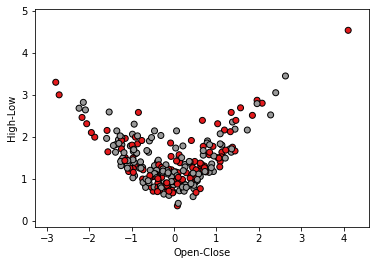

In [8]:
plt.scatter(X['Open-Close'], X['High-Low'], c=Y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Open-Close')
plt.ylabel('High-Low')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [9]:
# 학습 데이터와 테스트 데이터를 분할
split_ratio = 0.7
split = int(split_ratio* len(tmp_df))
X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [10]:
# 1~15까지의 k값을 가진 모델 생성
train_acc = []
test_acc = []

for n in range(1,15):
    clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=n)
    clf.fit(X_train, Y_train)
    prediction = clf.predict(X_test)
    train_acc.append(clf.score(X_train, Y_train))
    test_acc.append((prediction==Y_test).mean())

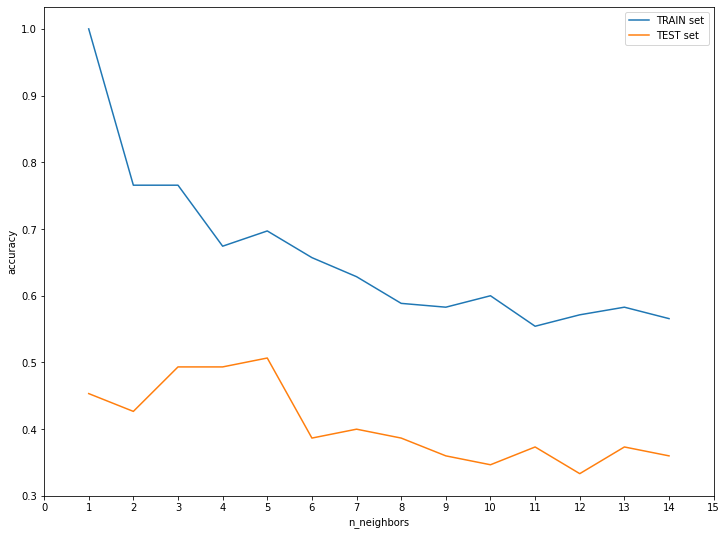

In [11]:
# 그래프로 결과 보기
plt.figure(figsize=(12, 9))
plt.plot(range(1, 15), train_acc, label='TRAIN set')
plt.plot(range(1, 15), test_acc, label='TEST set')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 16, step=1))
plt.legend();

In [12]:
knn = KNeighborsClassifier(n_neighbors = 14)

knn.fit(X_train,Y_train)

accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print('훈련 정확도 : %.2f' % accuracy_train)
print('테스트 정확도 : %.2f' % accuracy_test)

훈련 정확도 : 0.57
테스트 정확도 : 0.36


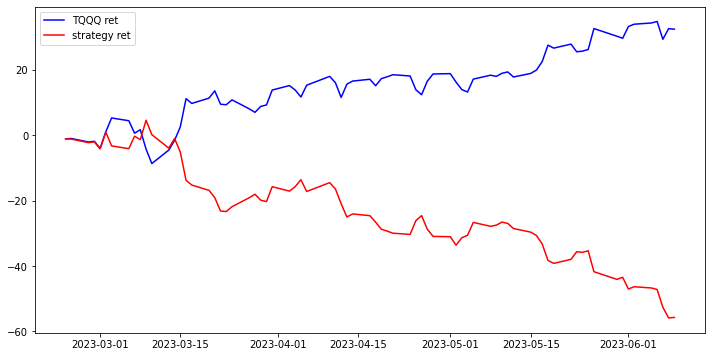

In [13]:
# KNN 모델
# 1 이라고 예측하면 매수
# -1 이라고 예측하면 공매도

tmp_df['Predicted_Signal'] = knn.predict(X)

tmp_df['TQQQ_ret'] = np.log(tmp_df['Close'] / tmp_df['Open'])
cum_tqqq_ret = tmp_df[split:]['TQQQ_ret'].cumsum() * 100

tmp_df['strategy_ret'] = tmp_df['TQQQ_ret'] * tmp_df['Predicted_Signal'].shift(1)
cum_st_ret = tmp_df[split:]['strategy_ret'].cumsum() * 100

plt.figure(figsize=(12,6))
plt.plot(cum_tqqq_ret, color='b',label='TQQQ ret')
plt.plot(cum_st_ret , color='r', label='strategy ret')
plt.legend()
plt.show()

In [14]:
print('TOTAL : ',tmp_df['Predicted_Signal'].count())
print('UP predict : ',tmp_df.loc[tmp_df['Predicted_Signal'] == 1,['Predicted_Signal']].count()[0])
print('DOWN predict : ',tmp_df.loc[tmp_df['Predicted_Signal'] == -1,['Predicted_Signal']].count()[0])

TOTAL :  250
UP predict :  108
DOWN predict :  142


In [15]:
test = tmp_df[split:]['TQQQ_ret']

In [16]:
test.cumsum()

Date
2023-02-23 00:00:00-05:00   -0.011275
2023-02-24 00:00:00-05:00   -0.010356
2023-02-27 00:00:00-05:00   -0.021089
2023-02-28 00:00:00-05:00   -0.018828
2023-03-01 00:00:00-05:00   -0.040363
2023-03-02 00:00:00-05:00    0.010668
2023-03-03 00:00:00-05:00    0.052450
2023-03-06 00:00:00-05:00    0.043997
2023-03-07 00:00:00-05:00    0.005930
2023-03-08 00:00:00-05:00    0.016424
2023-03-09 00:00:00-05:00   -0.042849
2023-03-10 00:00:00-05:00   -0.086885
2023-03-13 00:00:00-04:00   -0.045731
2023-03-14 00:00:00-04:00   -0.016330
2023-03-15 00:00:00-04:00    0.025196
2023-03-16 00:00:00-04:00    0.111405
2023-03-17 00:00:00-04:00    0.096860
2023-03-20 00:00:00-04:00    0.113100
2023-03-21 00:00:00-04:00    0.135371
2023-03-22 00:00:00-04:00    0.094485
2023-03-23 00:00:00-04:00    0.092921
2023-03-24 00:00:00-04:00    0.107747
2023-03-27 00:00:00-04:00    0.080445
2023-03-28 00:00:00-04:00    0.069647
2023-03-29 00:00:00-04:00    0.087728
2023-03-30 00:00:00-04:00    0.092192
2023-03

In [17]:
std = cum_st_ret.std()
sharpe = (cum_st_ret - cum_tqqq_ret) / std
sharpe = sharpe.mean()
print('Sharpe ratio : %.2f' % sharpe)

Sharpe ratio : -2.62


In [18]:
print(cum_tqqq_ret.to_string())

Date
2023-02-23 00:00:00-05:00    -1.127506
2023-02-24 00:00:00-05:00    -1.035593
2023-02-27 00:00:00-05:00    -2.108947
2023-02-28 00:00:00-05:00    -1.882757
2023-03-01 00:00:00-05:00    -4.036331
2023-03-02 00:00:00-05:00     1.066819
2023-03-03 00:00:00-05:00     5.244968
2023-03-06 00:00:00-05:00     4.399651
2023-03-07 00:00:00-05:00     0.592967
2023-03-08 00:00:00-05:00     1.642385
2023-03-09 00:00:00-05:00    -4.284945
2023-03-10 00:00:00-05:00    -8.688469
2023-03-13 00:00:00-04:00    -4.573053
2023-03-14 00:00:00-04:00    -1.632976
2023-03-15 00:00:00-04:00     2.519567
2023-03-16 00:00:00-04:00    11.140550
2023-03-17 00:00:00-04:00     9.685976
2023-03-20 00:00:00-04:00    11.310046
2023-03-21 00:00:00-04:00    13.537135
2023-03-22 00:00:00-04:00     9.448457
2023-03-23 00:00:00-04:00     9.292081
2023-03-24 00:00:00-04:00    10.774743
2023-03-27 00:00:00-04:00     8.044468
2023-03-28 00:00:00-04:00     6.964680
2023-03-29 00:00:00-04:00     8.772766
2023-03-30 00:00:00-